In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
import os

# To Do
- include bb and rexp
- create multicolor lines (https://matplotlib.org/examples/pylab_examples/multicolored_line.html)
- show clicks on image (correct and incorrect, separate colors)
- decrease image saturation to improve line visibility

In [11]:
def find_file(suffix, path):
    """
    return the filename of the log file
    """
    result_files = []
    for root, dirs, files in os.walk(path):
        for file in [f for f in files if f.endswith(suffix)]:
            result_files.append(file)
    return result_files
        
def read_file(path):
    """
    return content of log file
    """
    with open(path) as raw_jfile:
        content = json.load(raw_jfile)
        return content
    
def crop_list(lst):
    """
    remove entries from log file before the game starts and after the game is finished
    return cropped file as list
    """
    sub_lst = []
    for entry in lst:
        try:
            if entry["msg"] == "Game started!" and entry["user"]["name"]=="Image_Click_Bot":
                sub_lst = lst[lst.index(entry):]
            if "no images left" in entry["msg"].lower() and entry["user"]["name"]=="Image_Click_Bot":
                sub_lst = lst[:lst.index(entry)+1]
        except:
            pass
    return sub_lst

def images_in_log(file):
    """
    split log file on new_image commands
    return list containing one section for each image in log file, 
    each of them starting with a new_image command
    """
    file = crop_list(file)
    images = []
    i = False
    i_prev = False
    for entry in [e for e in file if e["type"] == "new_image"]:
        if i:
            i_prev = i
            i = file.index(entry)
            images.append(file[i_prev:i])
        else:
            i = file.index(entry)
    images.append(file[i:]) # slice from last new_image to end of file
    return images

def image_data(img_slice):
    """
    extract image filename and tracking coordinates from img section in log file
    """
    coordinates = []
    filename = ""
    for entry in img_slice: 
        try: 
            if entry["type"]=="new_image":
                filename = entry["url"].split("/")[-1]
            if entry["type"]=="mouse_move":
                coordinates.append(entry["coordinates"])
        except: 
            pass
    return filename,coordinates

def plot_mouse(img):
    """
    extract filnames and coordinates from image section, plot image and mouse movement
    """
    filename,coordinates=image_data(img)
    if filename == "" : or len(coordinates) == 0:
        print ("Missing Data")
        return
    xdata,ydata = [],[]
    for i in coordinates: 
        pos = i["pos"]
        xdata.append(pos["x"])
        ydata.append(pos["y"])
    fig, ax = plt.subplots()
    fig.set_size_inches(10,20)
    imshow = ax.imshow(plt.imread("images/"+filename))
    imshow.set_cmap('Greys')
    ax.add_line(matplotlib.lines.Line2D(xdata,ydata,color="red"))

In [17]:
cwd = os.getcwd()
files = find_file(".log", cwd)

Missing Data in image


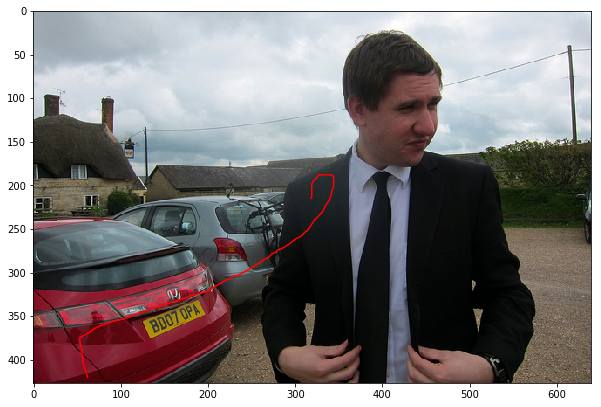

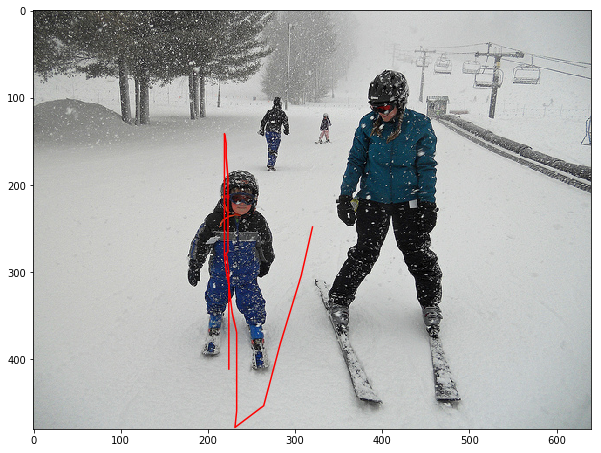

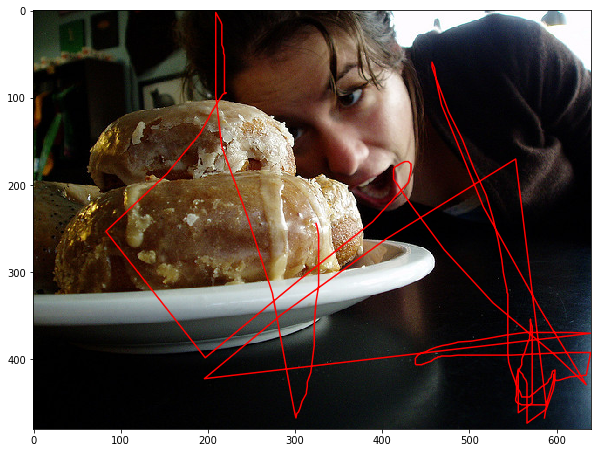

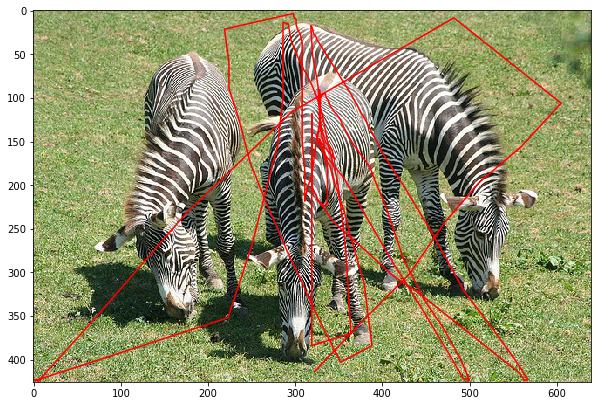

In [18]:
for f in files:
    log_file = read_file(f)
    for i in images_in_log(log_file):
        plot_mouse(i)